In [1]:
import pyprob
from pyprob.distributions import Normal

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Define a query as a regular Python function

In [2]:
def gaussian(obs, sigma=math.sqrt(2), mu0=1, sigma0=math.sqrt(5)):
    mu = pyprob.sample(Normal(mu0, sigma0))
    mu = pyprob.sample(Normal(mu0, sigma0))
    likelihood = Normal(mu, sigma)
    for o in obs:
        pyprob.observe(likelihood, o)
    return mu

In [3]:
gaussian([], 0.01, 2, 0.01)

1.98665415548964

## Construct inference from query

In [4]:
model = pyprob.Model(gaussian, default_observes=[1,2])

A lazy prior_sample generator:

In [5]:
s = model.prior_sample([7,9])
type(s)

generator

In [6]:
next(s)

-0.0890509098832144

A collection of samples from prior:

In [7]:
model.prior_samples(10, [])

[5.0955183732933245,
 -0.7598746408265624,
 1.4241932692066634,
 3.1988785043074857,
 3.5813024618488067,
 -1.0846075546298612,
 3.836177618582931,
 -1.5645995379861417,
 1.5062776337261008,
 -0.3304239675397487]

Inspect traces from prior:

In [8]:
s = model.prior_trace([8, 9])
next(s)

Trace(length:2, samples:[Sample(address_suffixed:2/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[-0.5195187926292419]), Sample(address_suffixed:3/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[-1.9881068468093872])], observes_tensor:[[8.0], [9.0]], result:-1.9881069001402123, log_p:-57.65621742135366)

In [9]:
model.prior_traces(3, [8, 9])

[Trace(length:2, samples:[Sample(address_suffixed:2/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[-1.5728801488876343]), Sample(address_suffixed:3/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[-1.7213577032089233])], observes_tensor:[[8.0], [9.0]], result:-1.7213576464587024, log_p:-54.89410031537919),
 Trace(length:2, samples:[Sample(address_suffixed:2/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[-0.5293397903442383]), Sample(address_suffixed:3/gaussian_Normal, distribution:Normal(prior_mean:1, prior_std:2.23606797749979, proposal_mean:None, proposal_std:None), value:[2.188663959503174])], observes_tensor:[[8.0], [9.0]], result:2.188663983878542, log_p:-22.572505401165227),
 Trace(length:2, samples:[Sample(address_suffixed:2/gaussian_Normal, distri

## Inference with importance sampling

In [10]:
%time empirical_posterior = model.posterior_samples(10000, [8, 9])

CPU times: user 5.7 s, sys: 252 ms, total: 5.95 s
Wall time: 5.95 s


In [11]:
def true_posterior(x):
    p = Normal(7.25, math.sqrt(1/1.2))
    return math.exp(p.log_pdf(x))

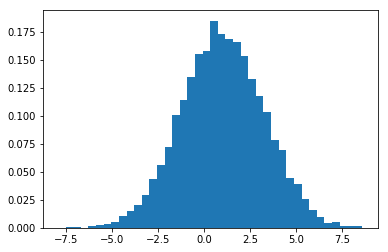

In [12]:
n, bins, patches = plt.hist(empirical_posterior.values,bins=40,normed=True)

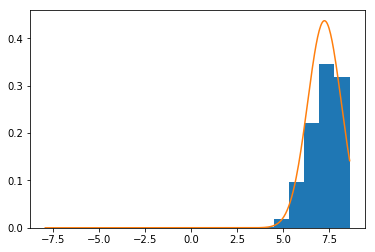

In [13]:
n, bins, patches = plt.hist(empirical_posterior.values, bins=20,weights=empirical_posterior.weights)
x = np.linspace(min(empirical_posterior.values),max(empirical_posterior.values),400)
plt.plot(x, np.vectorize(true_posterior)(x))

## Inference compilation

In [14]:
pyprob.set_cuda(False)
model.learn_proposal()

────────┬─────────────┬───────┬─────────────────┬─────────────────
        │ Train. time │ Trace │ Training loss   │ Valid. loss     
────────┼─────────────┼───────┼─────────────────┼─────────────────
Start   │ 0d:00:00:00 │ 0     │ +9.044794e+00   │ +8.007381e+00
Best    │ 0d:00:00:07 │ 2,304 │ +5.032424e+00   │ +4.898139e+00
Current │ 0d:00:00:07 │ 2,304 │ +5.032424e+00 ▼ │ +4.898139e+00 ▼
────────┴─────────────┴───────┴─────────────────┴─────────────────
Training on CPU, 71  traces/s
Stopped


## Inference with compiled sequential importance sampling

In [15]:
%time empirical_posterior = model.posterior_samples(1000, [8, 9])

CPU times: user 23 s, sys: 7.61 s, total: 30.6 s
Wall time: 7.66 s


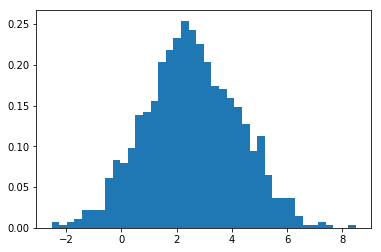

In [17]:
n, bins, patches = plt.hist(empirical_posterior.values,bins=40,normed=True)

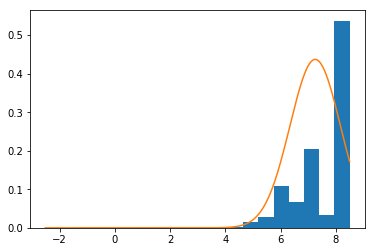

In [19]:
n, bins, patches = plt.hist(empirical_posterior.values, bins=20,weights=empirical_posterior.weights)
x = np.linspace(min(empirical_posterior.values),max(empirical_posterior.values),400)
plt.plot(x, np.vectorize(true_posterior)(x))